In [2]:
# Importamos las librerías necesarías y fijamos la semilla
import numpy as np
import random
import scipy
from scipy.stats import uniform as spuniform
import matplotlib.pyplot as plt

from matplotlib import pyplot
import math
import statistics
import pandas as pd
import time

from matplotlib import colors

np.random.seed(11)

In [3]:

#genera un grafo con NR regiones, cada una con NP provincias
def grafo(NR,NP):
    R = {} #Diccionario con las regiones
    C = {} #Diccionario con los costos
    for i in range(NR):
        pi = []
        for p in range(NP):  #crea una tupla (x,y) posición de la provincia
            pi.append(np.array([np.random.uniform(), i + np.random.uniform()]))
        R[i] = pi
    for r in R:
        if r < len(R)-1: #definimos el costo de cada arista
            C[r]= {}
            for j in range(len(R[r])): 
                C[r][j]= []
                for k in range(len(R[r+1])): #costo definido como distancia euclideana
                    C[r][j].append(np.linalg.norm(R[r][j] - R[r+1][k])) 
    return R , C

In [4]:
#se define el costo de una ruta como la suma de los costos de cada arista
def costo(ruta,distancias):
    S = 0
    for i in range(len(ruta)-1):
        inicio = ruta[i][1] #donde estoy
        fin = ruta[i+1][1] #donde voy
        S += distancias[i][inicio][fin] #sumo costo
    return S

Definimos un grafo con una ruta cualquiera

In [5]:
R,C = grafo(4,4)
ruta= [(i,np.random.randint(0,len(R[i])))for i in range(len(R))]
costo(ruta,C)

3.446879329043201

Aplicamos Simulated Annealing. Para esto se requiere:

- mapa: un grafo creado con la función grafo
- distancias: costos asociados a las aristas del grafo anterior.
- sigma0: configuración (ruta) inicial.
- C: ponderador aplicado a la función $\beta$.
- beta: función beta para crear sucesión $\beta_n$.


In [6]:
def SimAnn(mapa,distancias,sigma0,C,beta,pasos=10**4):
    U = np.random.uniform(size = pasos) #se define las uniformes para cada paso
    sigmas = [sigma0] #almacenamos las configuraciones
    w = [costo(sigma0,distancias)] #almacenamos los costos de cada iteración
    conteo=0
    for i in range(pasos-1):
        sigma= sigmas[i] #configuración anterior
        betan= beta(i,C) #definimos beta_n segun la función dada
        #definimos el vecino
        region = np.random.randint(1,len(R)-1) #en qué región cambiar
        provincias = [i for i in range(len(R[region])) if i != sigma[region][1]] #provincias de la region menos la tomada
        prov = np.random.choice(provincias) #elijo a qué provincia cambiar
        #construimos el vecino
        tau = [sigma[0]]
        for j in range(1,len(sigma)):
            if j == region: #estoy en la región de cambio
                tau.append((j,prov))
            else:
                tau.append(sigma[j])
        ws = costo(sigma,distancias) #costo anterior
        wt = costo(tau,distancias) #costo vecino
        dif = np.exp(-betan*(wt-ws))
        #print("betan:",betan,"ws:",ws,"wt:",wt,"dif:",dif)
        if U[i] <= min(dif,1):
            conteo +=1
            sigmas.append(tau)
            w.append(costo(tau,distancias))
        else:
            sigmas.append(sigma)
            w.append(costo(sigma,distancias))
    print("transiciones hechas:",conteo)
    return sigmas[len(sigmas)-1] , w[len(sigmas)-1], w , sigmas



In [7]:
def beta2(n,C):
    return n/C

def beta3(n,C):
    return (n**2)/C

def beta4(n,C):
    return np.exp(n)/C

In [86]:
s, w,W, S = SimAnn(R,C,ruta,10,beta2)
w

transiciones hechas: 662


3.753971852817953

In [1]:
R, C = grafo(16,5)
pasos = 10**4
ruta= [(i,np.random.randint(0,len(R[i])))for i in range(len(R))]
s, w,W, S = SimAnn(R,C,ruta,10,beta2)

NameError: name 'grafo' is not defined

In [19]:
[R[s[i][0]][s[i][1]][0] for i in range(len(s))]

[0.6526147399155839,
 0.4527591644919976,
 0.33408289430233906,
 0.31818719398704765,
 0.30097916984093387,
 0.4155036692248403,
 0.4477711603657113,
 0.5388502918850757,
 0.505473168619571,
 0.6480464731725969,
 0.6139703292233637,
 0.7061476278277338,
 0.6734901437201956,
 0.6879362468714375,
 0.793282062247835,
 0.9084479428605393]

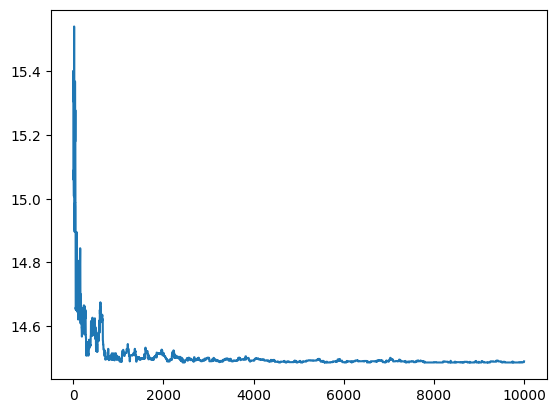

In [9]:
X = range(pasos)
plt.plot(X,W)

In [26]:
#sigma una configuración como secuencia de vértices
def plotear(sigma,ciudades):
    plt.figure()
    #graficar provincias
    X= [ciudades[i][j][0] for i in range(len(ciudades)) for j in range(len(ciudades[i]))]
    Y= [ciudades[i][j][1] for i in range(len(ciudades)) for j in range(len(ciudades[i]))]
    plt.scatter(X,Y, marker="o")
    for i in range(len(R)):
        plt.axhline(y = i, color = 'b', linestyle = '-')
    for i in range(len(sigma)-1):
        plt.plot([ciudades[sigma[i][0]][sigma[i][1]][0],ciudades[sigma[i+1][0]][sigma[i+1][1]][0]],[ciudades[sigma[i][0]][sigma[i][1]][1],ciudades[sigma[i+1][0]][sigma[i+1][1]][1]],'k-')

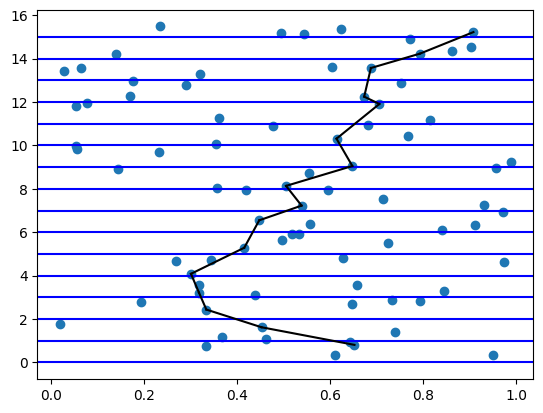

In [27]:
plotear(s,R)

[(0, 0),
 (1, 2),
 (2, 4),
 (3, 2),
 (4, 0),
 (5, 1),
 (6, 0),
 (7, 3),
 (8, 0),
 (9, 0),
 (10, 3),
 (11, 3),
 (12, 3),
 (13, 3),
 (14, 3),
 (15, 2)]

In [1]:
A =   [55808290, 304891685, 1721866234, 9270977970, 3179025274, 9270977966, 389678267, 9270977960, 389678104, 9270977978, 24960068, 1258698109, 389678145, 24960070, 24960073, 24960076, 24960080, 3707407641, 3707407638, 730029011, 730029007, 2557539842, 2557539841, 389678133, 389677909]
B = [55808290, 304891685, 1721866234, 9270977970, 3179025274, 9270977966, 389678267, 24960090, 9270977978, 24960068, 1258698109, 389678145, 24960070, 24960073, 24960076, 24960080, 3707407641, 3707407638, 730029011, 730029007, 2557539842, 2557539841, 389678133, 389677909]

print("LenA:",len(A))

print("LenB:",len(B))

LenA: 25
LenB: 24


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=45a688e7-b6e2-4e4a-b3a9-c39f5b699a07' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>